# Python Assignment - Kinney - 2023

## Description: 
Extract and analyze data such as mass, DNA, protein molecular weight, and GC content of penguin species

## Dependencies: 
(code for installation is provided, commented out)

BioPython 

Seaborn

Pandas

## Authors: Shelly Kinney, Dr. X

## Date Written/Updated: 05/05/2023

References listed when used

In [ ]:
######################## BCB 546X: Python Assignment Details ########################

# ** Your Mission: Complete Python code in a Jupyter Notebook ** #

#-- Functions --#
## 1. Document Dr. X's function with comments and with markdown text in your Jupyter notebook.
## 2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.
## 3. Write an alternative translation function.
## 4. Write a function that calculates the molecular weight of each 3 amino acid sequence.
## 5. Write a function that computes the GC-content of each DNA sequence.

#-- In the MAIN part of the script --#
## 6. Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## 7. Call your functions from step 3 (or step 2) and step 4 and fill in the new columns in the DataFrame.
## 8. Plot a bar-chart of adult body mass per species. In your description of the graph, 
#provide text that answers these questions: 
#       a. What is the smallest penguin species? 
#       b. What is the geographical range of this species?
## 9. Plot a graph that shows the molecular weight as a function of GC content. 
## 10. Write the entire DataFrame to a new CSV file that includes your new columns.
## 11. BONUS: What other visualizations, functions or tasks would you do with this dataset? 
#Add something interesting for fun. (0.5 additional points if your total score is < 15).

#-- Additional Instructions (points will be deducted if these instructions are not heeded) --#
## ** Do all of this in a Jupyter notebook and push it to a GitHub repository.
## ** Your repository should not contain any files other than those associated with this assignment. 
## ** Read all comments carefully and answer the questions by including information in your Jupyter notebook.
## ** Document all of your code (and Dr. X's code) very thoroughly so that it is clear what you did.
## ** Be sure to cite (by providing URLs or other appropriate citations) information appropriately in your documented notebook.
## ** Commit and push your completed work in the Jupyter notebook to your repository.
## ** Submit the URL to your git repository via Canvas by the end of the day on May 6, 2022.

#-- Disclaimer --#
## Not all of these tasks have been covered in class and you will have to use online resources to 
#find out how to do some of these tasks.




### Installation Code if Needed

In [1]:
#conda install pandas

#Use this code if not yet installed

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
#conda install biopython

#Use this code if not yet installed

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
#conda install seaborn

#Use this code if not yet installed

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



## Python Script

In [1]:
######################## Python Translate Script ########################

## IMPORTANT: install BioPython so that this will work

'''
Website of Reference unless otherwise noted:
    https://eeob-biodata.github.io/BCB546X-python/
'''

from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
#from Bio.SeqUtils import GC #??

import seaborn as sns



In [2]:
#%%%%%%%%%%%%%%%#
### FUNCTIONS ###
#%%%%%%%%%%%%%%%#


#1#
def get_sequences_from_file(fasta_fn):                         #creates function: name(input)
    sequence_data_dict = {}                                    #create a dictionary object for retrieved sequences
    for record in SeqIO.parse(fasta_fn, "fasta"):              #for loop started for sequences
        description = record.description.split()               #split description data
        species_name = description[1] + " " + description[2]   #create species name file with spaced description input 
        sequence_data_dict[species_name] = record.seq          #retrieve sequence related to species name
    return(sequence_data_dict)                                 #output is dictionary object with all sequences (values) 
                                                                   #attached to species name (keys)

    
##### Example: #####

#cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

#cytb_seqs

#RETURNS:

#{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
# 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
# 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
# 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
# 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
# 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
# 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
# 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
# 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
# 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
# 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
# 'Spheniscus magellanicus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA')}

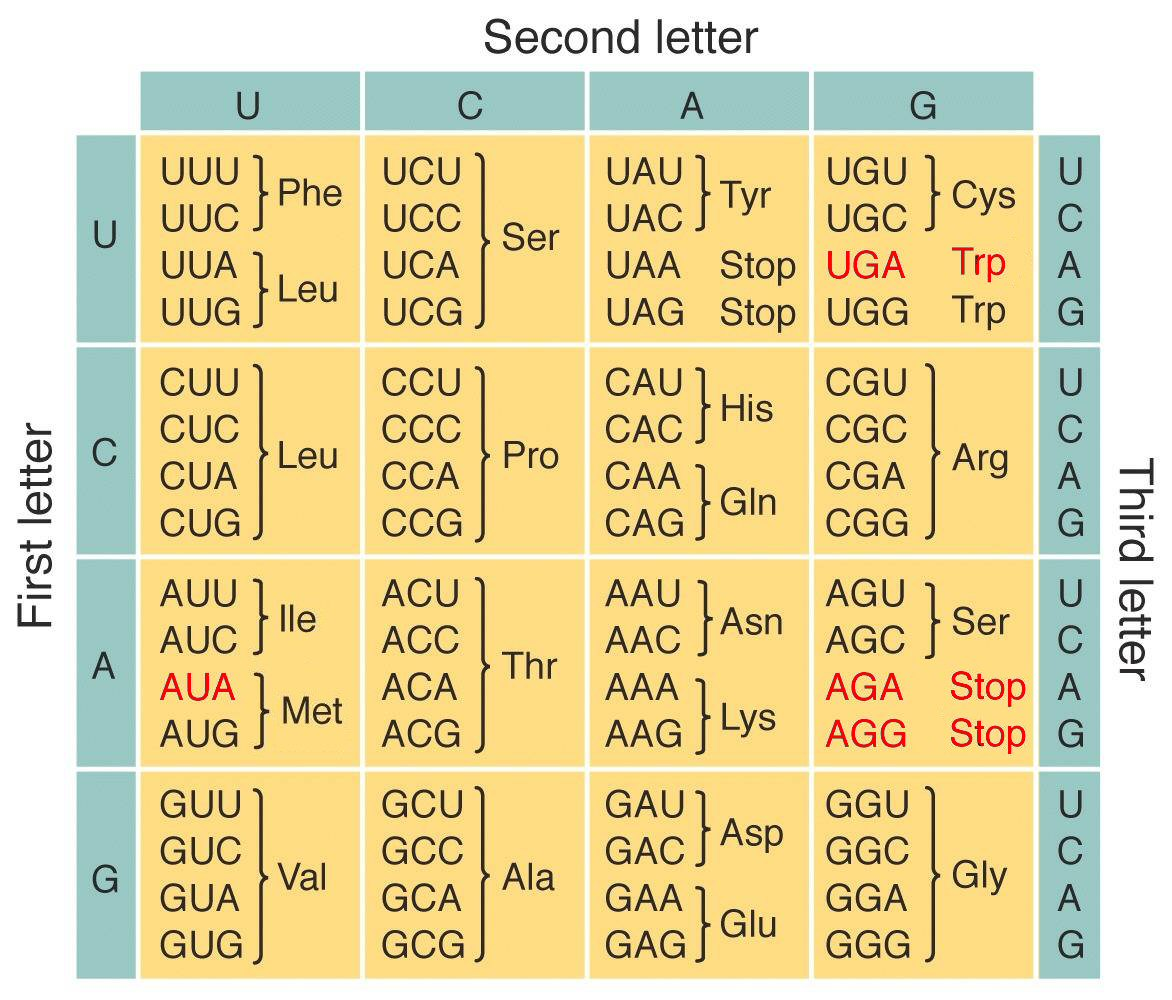

Codon to Amino Acid list for mitochondria

Website Reference: https://www.mun.ca/biology/scarr/MtDNA_code.html

In [3]:

#2#
def translate_seq_fn(nucleotides):                                                #creates function: name(input)
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]   #retrieves amino acid codon list
    mito_table.forward_table["TAA"] = "*"                                         #Replace "TAA" with "*" to identify stop
    mito_table.forward_table["TAG"] = "*"                                         #Replace "TAG" with "*" to identify stop
    mito_table.forward_table["AGA"] = "*"                                         #Replace "AGA" with "*" to identify stop
    mito_table.forward_table["AGG"] = "*"                                         #Replace "AGG" with "*" to identify stop
    aa_seq = ""                                                                   #creates object for amino acid sequence
    for i in range(0, len(nucleotides), 3):                                       #for loop, taking 3 nucleotides in sequence
        codon = nucleotides[i:i+3]                                                #putting nucleotides into codon object
        aa = mito_table.forward_table[codon]                                      #match codon to amino acid
        if aa != "*":                                                             #test for stop codon; if not stop, continue
            aa_seq += aa                                                          #adds amino acid to aa sequence
        else:                                                                     #break loop at stop codon presence
            break
    return(aa_seq)                                                                #returns amino acid sequence as string


##### Example ######
#cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

#test = cytb_seqs['Aptenodytes forsteri']

#translate_seq_fn(test)

#RETURNS:

#'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYL
#YKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKI
#PFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWAL
#VANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH'

In [4]:

#3#

'''
Reference Website for Translation:
    https://biopython.org/docs/1.75/api/Bio.Seq.html
Reference Website for Correct DNA codon table:
    https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi#SG2
'''



def translate(nucleotides):                                     #creates function: name(input)
    aa_seq = ""                                                 #creates object for amino acid sequence
    coding_dna = nucleotides                                    #puts nucleotides into object
    aa_seq = coding_dna.translate(table =2, to_stop=True)       #translates nucleotides into amino acid; uses mitochondria table
    str_aa_seq = str(aa_seq)                                    #sets amino acid object to a string
    return(str_aa_seq)                                          #returns sequence of amino acids as a string


##### Example #####

#cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

#test = cytb_seqs['Aptenodytes forsteri']

#translate(test)

#RETURNS:

# 'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFY
#YGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPL
#GIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTM
#AFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH'

In [5]:

#4#

'''
Reference Website to understand ProtParam:
    https://biopython.org/docs/1.76/api/Bio.SeqUtils.ProtParam.html
'''


def molweight(aa_seq):                                 #create function: name(input)
    weight = ""                                        #create object for weight
    aa_seq2 = ProteinAnalysis(aa_seq)                  #analyze amino acid sequence as protein
    weight = aa_seq2.molecular_weight()                #calculate molecular weight of analyzed sequence
    return(weight)                                     #return molecular weight of amino acid sequence as a float

##### Example #####

#cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

#test = cytb_seqs['Aptenodytes forsteri']

#test2 = translate(test)

#molweight(test2)

#RETURNS:

#42459.602100000004

In [6]:

#5#

'''
Reference Website: https://biopython.org/docs/1.74/api/Bio.SeqUtils.html
    Bio.SeqUtils.GC(seq)
    
    from Bio.SeqUtils import GC
    GC("ACTGN")

'''

def GCcontent(nucleotides):                                        #create function: name(input)
    GCcount = ""                                                   #create object for count of GC
    GCpercent = ""                                                 #create object for percent of GC
    GCcount = (nucleotides.count('G') + nucleotides.count('C'))    #calculates number of GC in DNA
    GCfrac = GCcount/(nucleotides.count('A') + nucleotides.count('G') + nucleotides.count('T') + nucleotides.count('C'))
                                                                   #calculates fraction of GC nucleotides in DNA
    GCpercent = GCfrac*100                                         #calculates percentage of GC in DNA
    return(GCpercent)                                              #return GC percentage as a float



#####  Example #####

#cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

#test = cytb_seqs['Aptenodytes forsteri']

#GCcontent(test)

#RETURNS:

#48.38145231846019


###### BONUS function ######

#needs [from Bio.SeqUtils import GC] to run

#def GC2(nucleotides):
#    GCPercent = GC(nucleotides)
#    return(GCPercent)
    

In [7]:
#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")  #Retrieve sequence information (function 1)

penguins_df = pd.read_csv("penguins_mass.csv")              # Includes only data for body mass 
species_list = list(penguins_df.species)                    # Retrieve species list from penguins_df column 'species'


#6#

for index, row in penguins_df.iterrows():                   #create for loop to create over rows of data frame
    status = 'NaN'                                          #create object with "NaN"
    penguins_df.loc[index, 'Mol. Weight'] = status          #create a new cell at end of row, containing "NaN"
    penguins_df.loc[index, 'GC Content'] = status           #create a new cell at end of row, containing "NaN"


In [8]:

#7#
count = 0                                                   #create a count variable

for key, value in cytb_seqs.items():                        #start a for loop for sequences
    aa_seq1 = translate(value)                              #translate sequence (function 3) and place in object 
    weight1 = molweight(aa_seq1)                            #get molecular weight (function 4) and place in object
    GCcont1 = GCcontent(value)                              #get GC content of sequence (function 5) and place in object
    penguins_df.loc[count, 'Mol. Weight'] = weight1         #set cell of row count number and col 'Mol. Weight' to weight object
    penguins_df.loc[count, 'GC Content'] = GCcont1          #set cell of row count number and col 'GC Content' to GCcont1 object
    count += 1                                              #increase count for next loop iteration9o\l,


In [9]:
penguins_df                                                 #check data frame is filled correctly

,species,mass,Mol. Weight,GC Content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.614,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.549,48.293963


<Axes: title={'center': 'Species Average Weight (g)'}, xlabel='Species'>

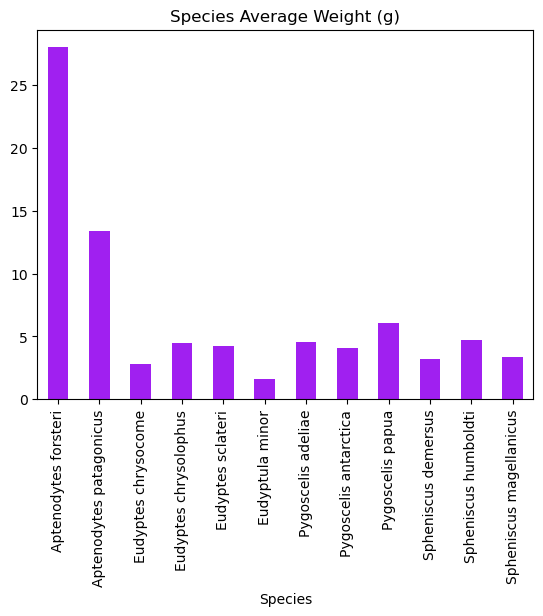

In [10]:

#8#


'''
Reference Website for Color Choice:
    https://librarycarpentry.org/library-python/06a-plotting-with-pandas/
'''


plot_mass_species = penguins_df.groupby('species')['mass'].mean()   
                       #create series with desired plotting variables (mass grouped by species)
plot_mass_species.plot(kind='bar',title='Species Average Weight (g)',color='#a020f0', xlabel='Species')
                       #plot series as bar graph, with set title and x-axis label, and specific color

                                                                    


#### 8.1
The smallest penguin species is: Eudyptula minor

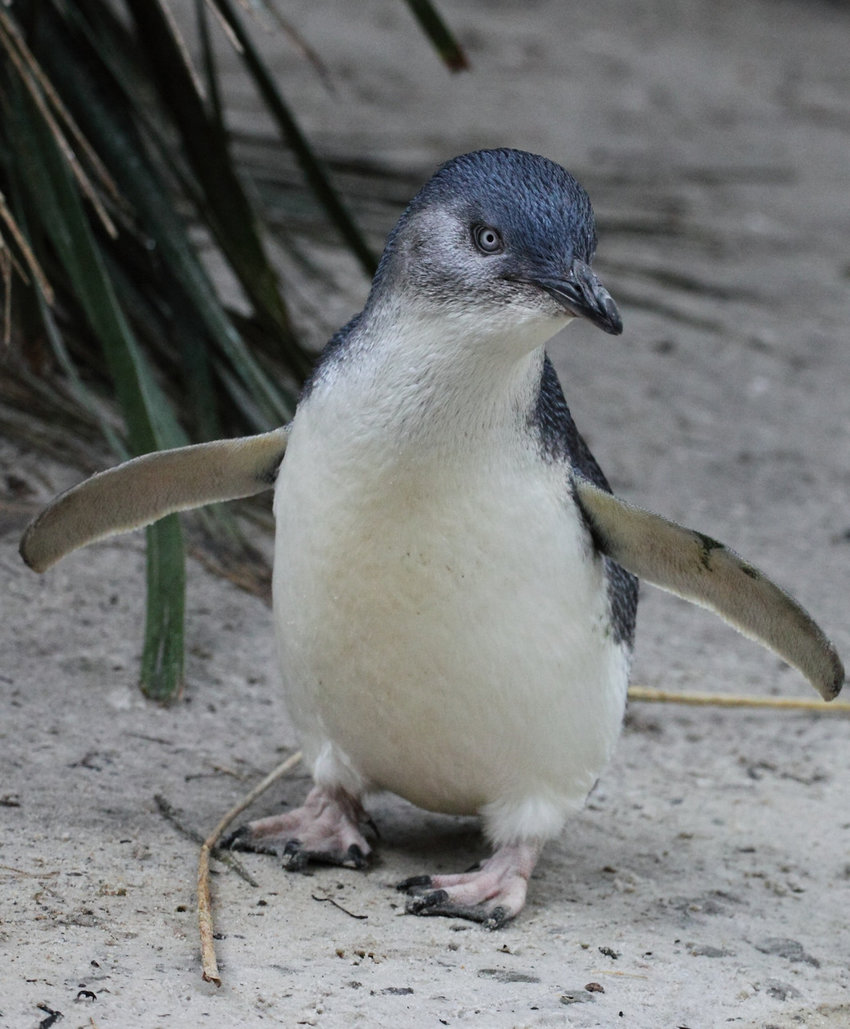

Website for Image: https://www.researchgate.net/figure/Adult-male-little-penguin-Eudyptula-minor_fig6_309143471

#### 8.2
This species is found in New Zealand. In the below diagram, its range is highlighted in blue.

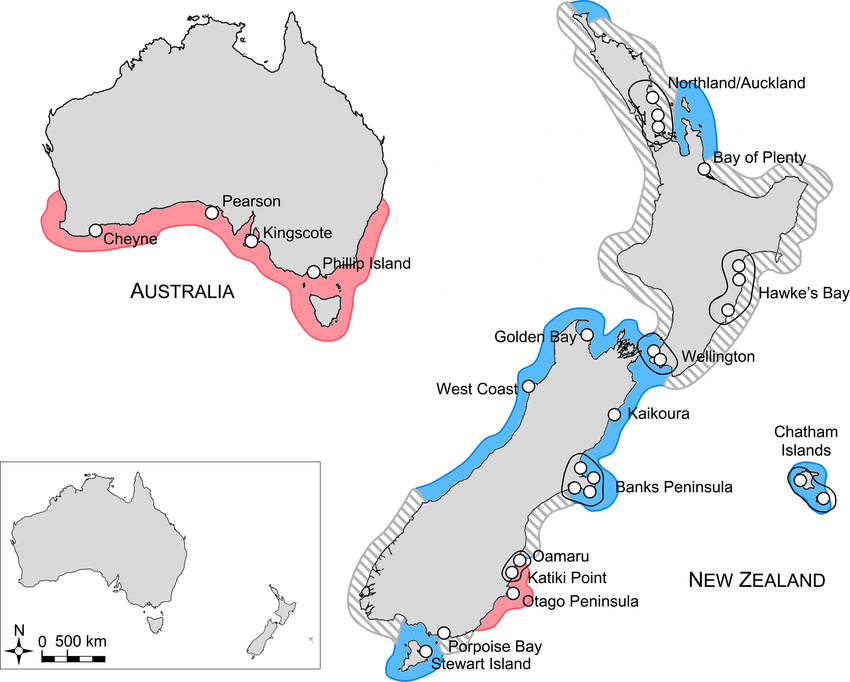

Image and Information Source: https://en.wikipedia.org/wiki/Little_penguin

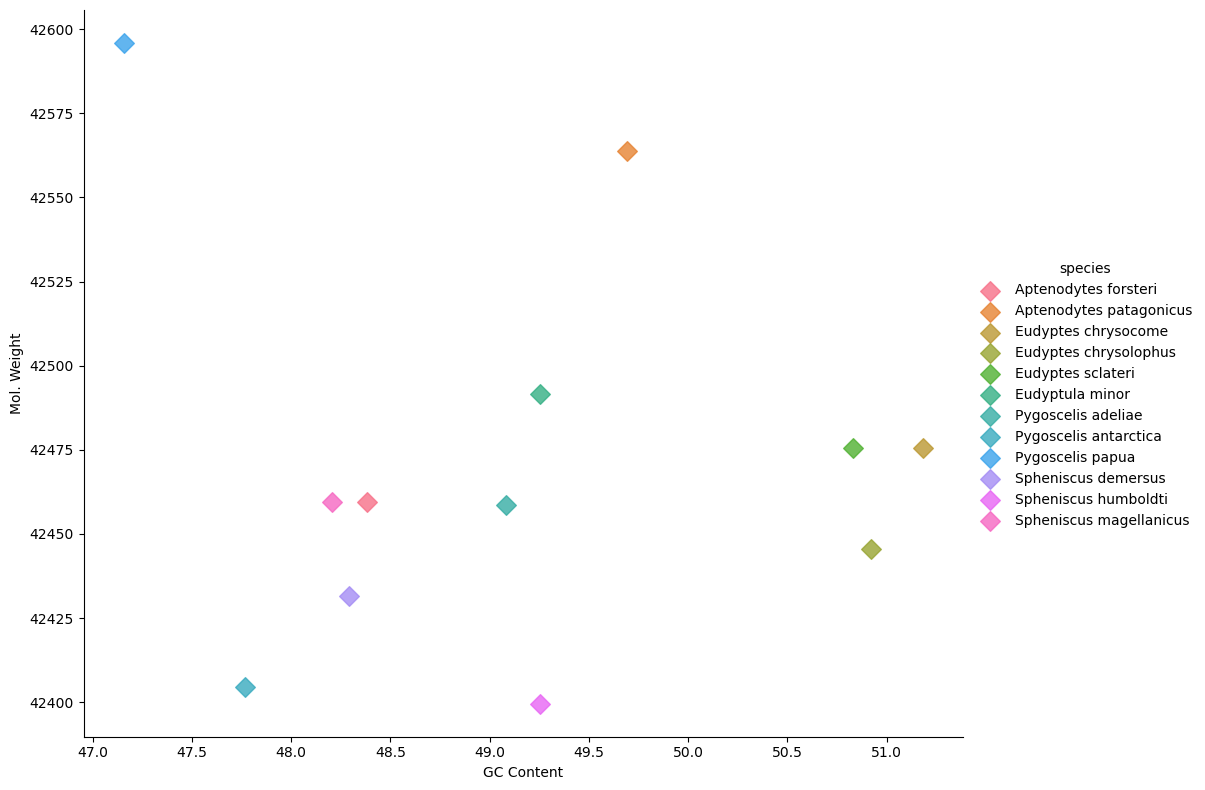

In [11]:

#9#

sns.lmplot(x="GC Content", y="Mol. Weight", data=penguins_df,
          fit_reg=False, height=8, aspect=1.25, scatter_kws={"s": 100},
          hue='species', markers='D')
#plot 'GC Content' on x-axis, 'Mol. Weight' on y-axis, coloring points by 'species'
#Other specifics: height, width, marker shape, and marker size are specified


In [12]:

#10#

'''
Reference Website for CSV code: 
    https://sparkbyexamples.com/pandas/pandas-write-dataframe-to-csv-file/#:~:text=By%20using%20pandas.,index%20as%20the%20first%20column.
'''


penguins_df.to_csv("penguins_mass_cytb.csv") #create file containing data from the created data frame


In [13]:

#11#
#Calculate the percentage of similar nucleotides between two DNA sequences

def dna_compare(a, b):                       #Create function: name(input1, input2)
    seq1 = a                                 #create object for input1
    seq2 = b                                 #create object for input2
    same = 0                                 #create starting same value for number of exact matching nucleotides
    for i in range(0, len(a)):               #start for loop for range of input1 (lengths should be identical in this data)
        if seq1[i] == seq2[i]:               #if nucleotides at same location are equal
            same += 1                        #increase number of exact matching nucleotides
    percent_equal = (same/len(b))*100        #calculate percentage of total DNA is shared between two inputs
    return(percent_equal)                    #return percentage equal as a float

                   
##### Example #####

#seqA = cytb_seqs['Aptenodytes forsteri']
#seqB = cytb_seqs['Eudyptes chrysocome']


#dna_compare(seqA, seqB)

#RETURNS:

#90.37620297462817

End of Python Script